In [112]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [4]:
df_final = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet")

In [3]:
df_final.head()

,id,cleanedContent,label,category,emotion_label,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq,date,rawContent,probability.negative,probability.neutral,probability.positive
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South,fear,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...,2020-05-06 11:07:40+00:00,Everyday that the killers of #AhmaudArbery rem...,0.830641,0.159382,0.009977
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South,disgust,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,take day arrest gregorymcmichael travismcmicha...,2020-05-08 10:31:49+00:00,It took 59 days for the @GBI_GA to arrest #Gre...,0.806295,0.188493,0.005212
12,1260986640148955136,TN is already starting. They say that #COVID19...,negative,African American South,anger,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...,2020-05-14 17:33:37+00:00,#TN is already starting. They say that #COVID1...,0.484034,0.357467,0.158500
20,1265664683941474309,5) I pledge that I will keep myself aware of w...,neutral,African American South,optimism,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...,2020-05-27 15:22:30+00:00,5) I pledge that I will keep myself aware of w...,0.170736,0.617685,0.211579
28,1265698571053142016,"@user Many may not know me, but I am a progres...",positive,African American South,optimism,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn ubi end citi...,2020-05-27 17:37:09+00:00,"@KyleKulinski Many may not know me, but I am a...",0.005067,0.107326,0.887606


In [5]:
df_final.columns

Index(['id', 'cleanedContent', 'label', 'category', 'emotion_label', 'text',
       'text_without_stopwords', 'text_lemmatized',
       'text_without_stopwords_freq', 'date', 'rawContent',
       'probability.negative', 'probability.neutral', 'probability.positive',
       'probability.anger', 'probability.anticipation', 'probability.fear',
       'probability.joy', 'probability.optimism', 'probability.sadness',
       'Normalized_sentiment_score'],
      dtype='object')

# Sentiment Correlation

In [3]:
df_final = df_final[['probability.negative', 'probability.neutral', 'probability.positive']]

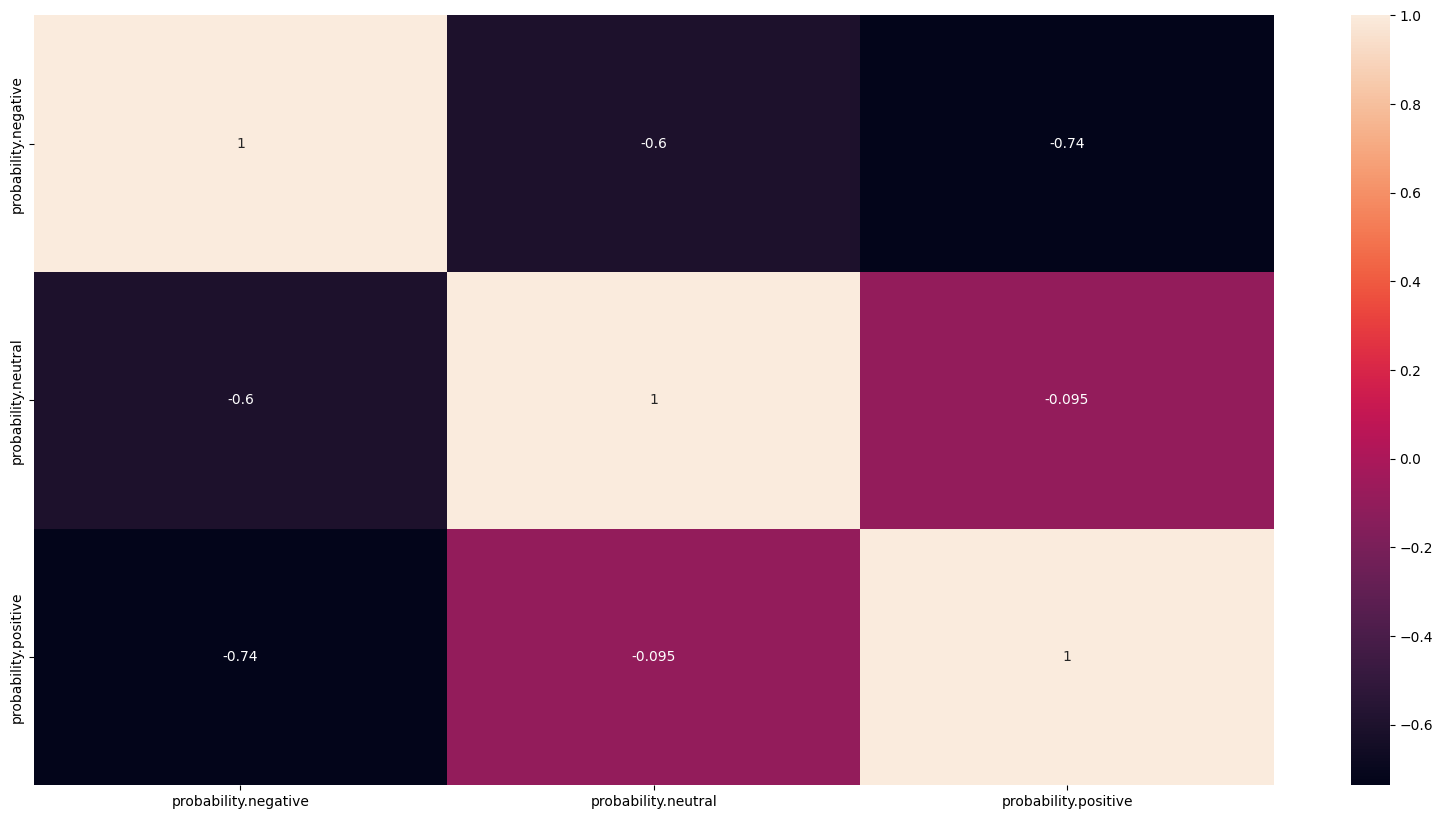

In [6]:
corr = df_final.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(corr, annot=True)
plt.show()

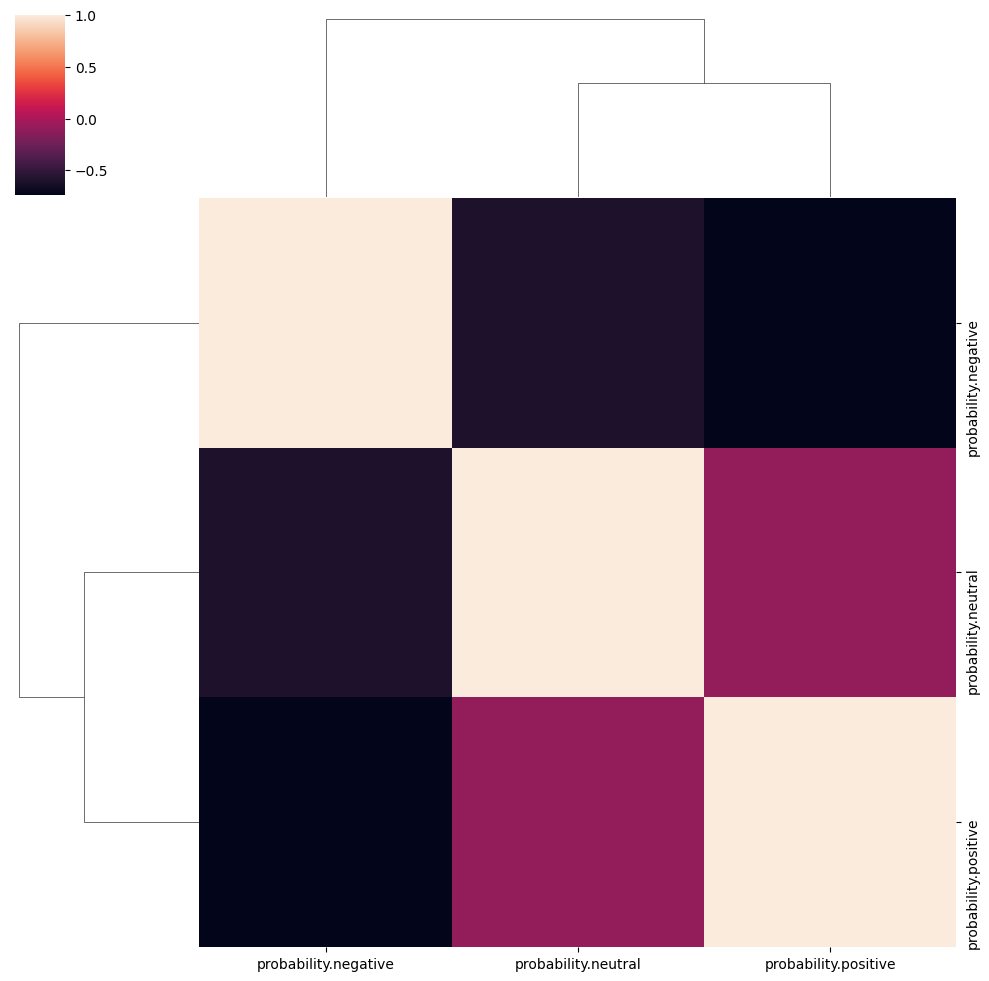

In [7]:
sns.clustermap(corr)

In [9]:
df_final['sum'] = df_final.sum(axis=1)

In [17]:
df_final['sum'] < 1

0           False
2           False
12           True
20          False
28           True
            ...  
57120365    False
57120370     True
57120378    False
57120386    False
57120391    False
Name: sum, Length: 4686071, dtype: bool

# Emotion Correlation

In [3]:
df_final = df_final[['probability.anger', 'probability.anticipation', 'probability.disgust',
       'probability.fear', 'probability.joy', 'probability.love',
       'probability.optimism', 'probability.pessimism', 'probability.sadness',
       'probability.surprise', 'probability.trust']]

In [3]:
corr = df_final.corr()

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_10460\1675215204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


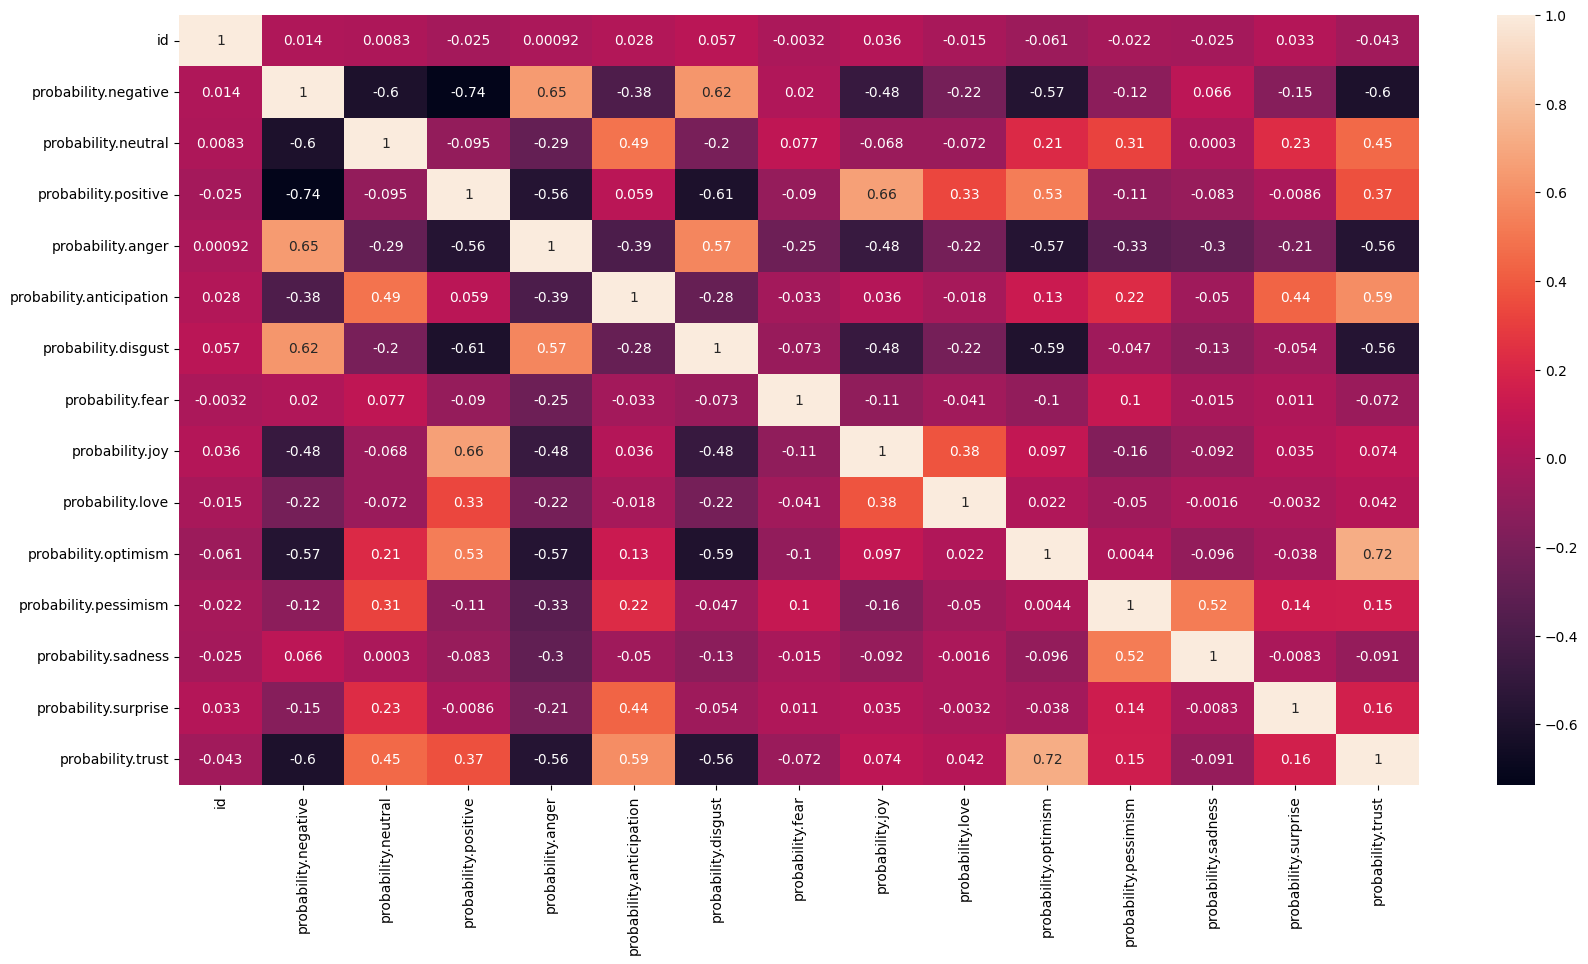

In [4]:
plt.figure(figsize=(20, 10))

sns.heatmap(corr, annot=True)
plt.show()

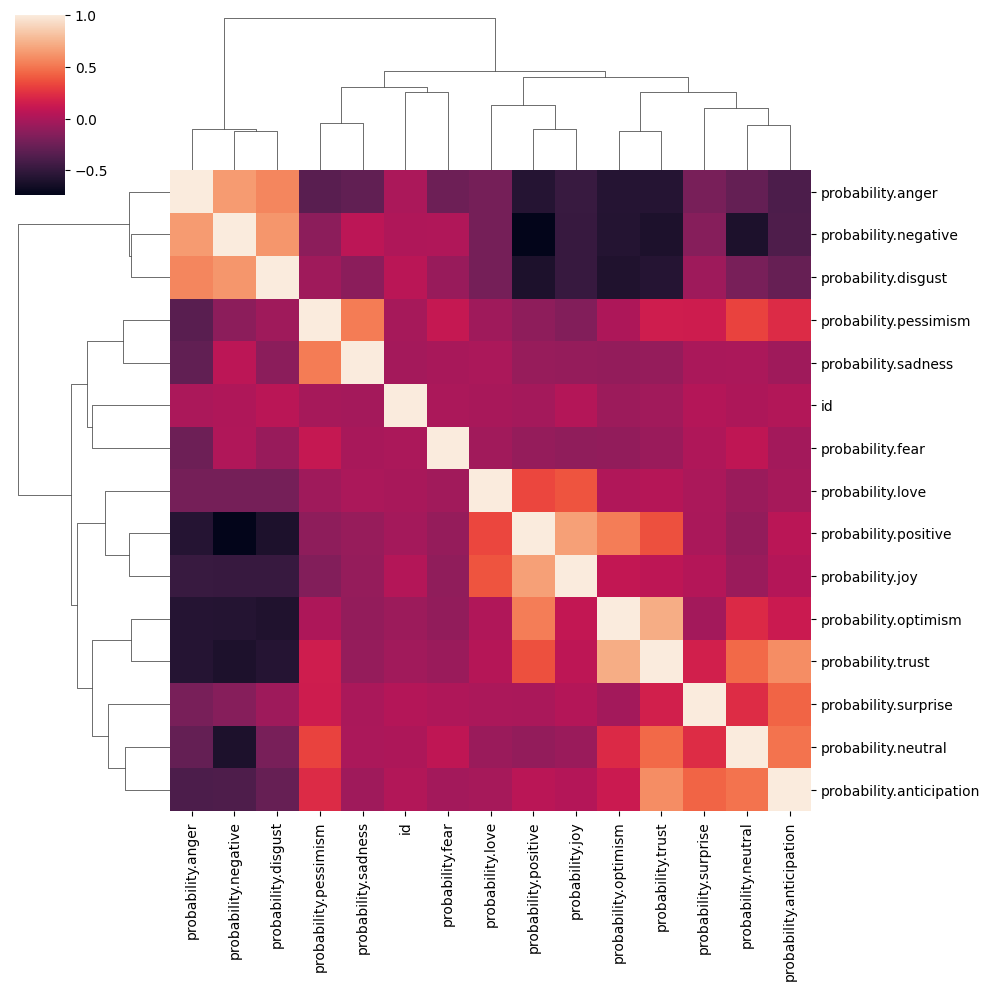

In [5]:
sns.clustermap(corr)

optimism = optimism + trust ; remove trust
anticipation = anticipation + surprise ; remove surprise
anger = anger + disgust ; remove disgust
joy = joy + love ; remove love


In [10]:
df_final.head()

,id,cleanedContent,label,category,emotion_label,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq,date,rawContent,probability.negative,probability.neutral,probability.positive,probability.anger,probability.anticipation,probability.fear,probability.joy,probability.optimism,probability.sadness
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South,fear,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...,2020-05-06 11:07:40+00:00,Everyday that the killers of #AhmaudArbery rem...,0.830641,0.159382,0.009977,0.279881,0.004095,0.352227,0.000745,0.003695,0.359357
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South,disgust,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,take day arrest gregorymcmichael travismcmicha...,2020-05-08 10:31:49+00:00,It took 59 days for the @GBI_GA to arrest #Gre...,0.806295,0.188493,0.005212,0.796906,0.005784,0.159391,0.000317,0.000924,0.036677
12,1260986640148955136,TN is already starting. They say that #COVID19...,negative,African American South,anger,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...,2020-05-14 17:33:37+00:00,#TN is already starting. They say that #COVID1...,0.484034,0.357467,0.158500,0.810908,0.010574,0.014736,0.002848,0.137127,0.023808
20,1265664683941474309,5) I pledge that I will keep myself aware of w...,neutral,African American South,optimism,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...,2020-05-27 15:22:30+00:00,5) I pledge that I will keep myself aware of w...,0.170736,0.617685,0.211579,0.013011,0.030190,0.004790,0.005827,0.929707,0.016474
28,1265698571053142016,"@user Many may not know me, but I am a progres...",positive,African American South,optimism,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn ubi end citi...,2020-05-27 17:37:09+00:00,"@KyleKulinski Many may not know me, but I am a...",0.005067,0.107326,0.887606,0.007553,0.072251,0.001653,0.069170,0.847429,0.001945


In [18]:
df_final['emotion_label'].value_counts()

anger           3048518
optimism         621653
joy              380545
anticipation     214635
sadness          213073
fear             207647
Name: emotion_label, dtype: int64

In [8]:
df_final['probability.joy'] = df_final['probability.joy'] + df_final['probability.love']
df_final['probability.anger'] = df_final['probability.anger'] + df_final['probability.disgust']
df_final['probability.anticipation'] = df_final['probability.anticipation'] + df_final['probability.surprise']
df_final['probability.optimism'] = df_final['probability.optimism'] + df_final['probability.trust']
df_final['probability.sadness'] = df_final['probability.sadness'] + df_final['probability.pessimism']

In [9]:
df_final.drop(columns=['probability.disgust', 'probability.surprise', 'probability.trust', 'probability.love', 'probability.pessimism'], inplace=True)

In [11]:
df_final.head()

,id,cleanedContent,label,category,emotion_label,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq,date,rawContent,probability.negative,probability.neutral,probability.positive,probability.anger,probability.anticipation,probability.fear,probability.joy,probability.optimism,probability.sadness
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South,fear,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...,2020-05-06 11:07:40+00:00,Everyday that the killers of #AhmaudArbery rem...,0.830641,0.159382,0.009977,0.279881,0.004095,0.352227,0.000745,0.003695,0.359357
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South,disgust,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,take day arrest gregorymcmichael travismcmicha...,2020-05-08 10:31:49+00:00,It took 59 days for the @GBI_GA to arrest #Gre...,0.806295,0.188493,0.005212,0.796906,0.005784,0.159391,0.000317,0.000924,0.036677
12,1260986640148955136,TN is already starting. They say that #COVID19...,negative,African American South,anger,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...,2020-05-14 17:33:37+00:00,#TN is already starting. They say that #COVID1...,0.484034,0.357467,0.158500,0.810908,0.010574,0.014736,0.002848,0.137127,0.023808
20,1265664683941474309,5) I pledge that I will keep myself aware of w...,neutral,African American South,optimism,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...,2020-05-27 15:22:30+00:00,5) I pledge that I will keep myself aware of w...,0.170736,0.617685,0.211579,0.013011,0.030190,0.004790,0.005827,0.929707,0.016474
28,1265698571053142016,"@user Many may not know me, but I am a progres...",positive,African American South,optimism,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn ubi end citi...,2020-05-27 17:37:09+00:00,"@KyleKulinski Many may not know me, but I am a...",0.005067,0.107326,0.887606,0.007553,0.072251,0.001653,0.069170,0.847429,0.001945


C:\Users\fashaikh\AppData\Local\Temp\ipykernel_10460\1303413143.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


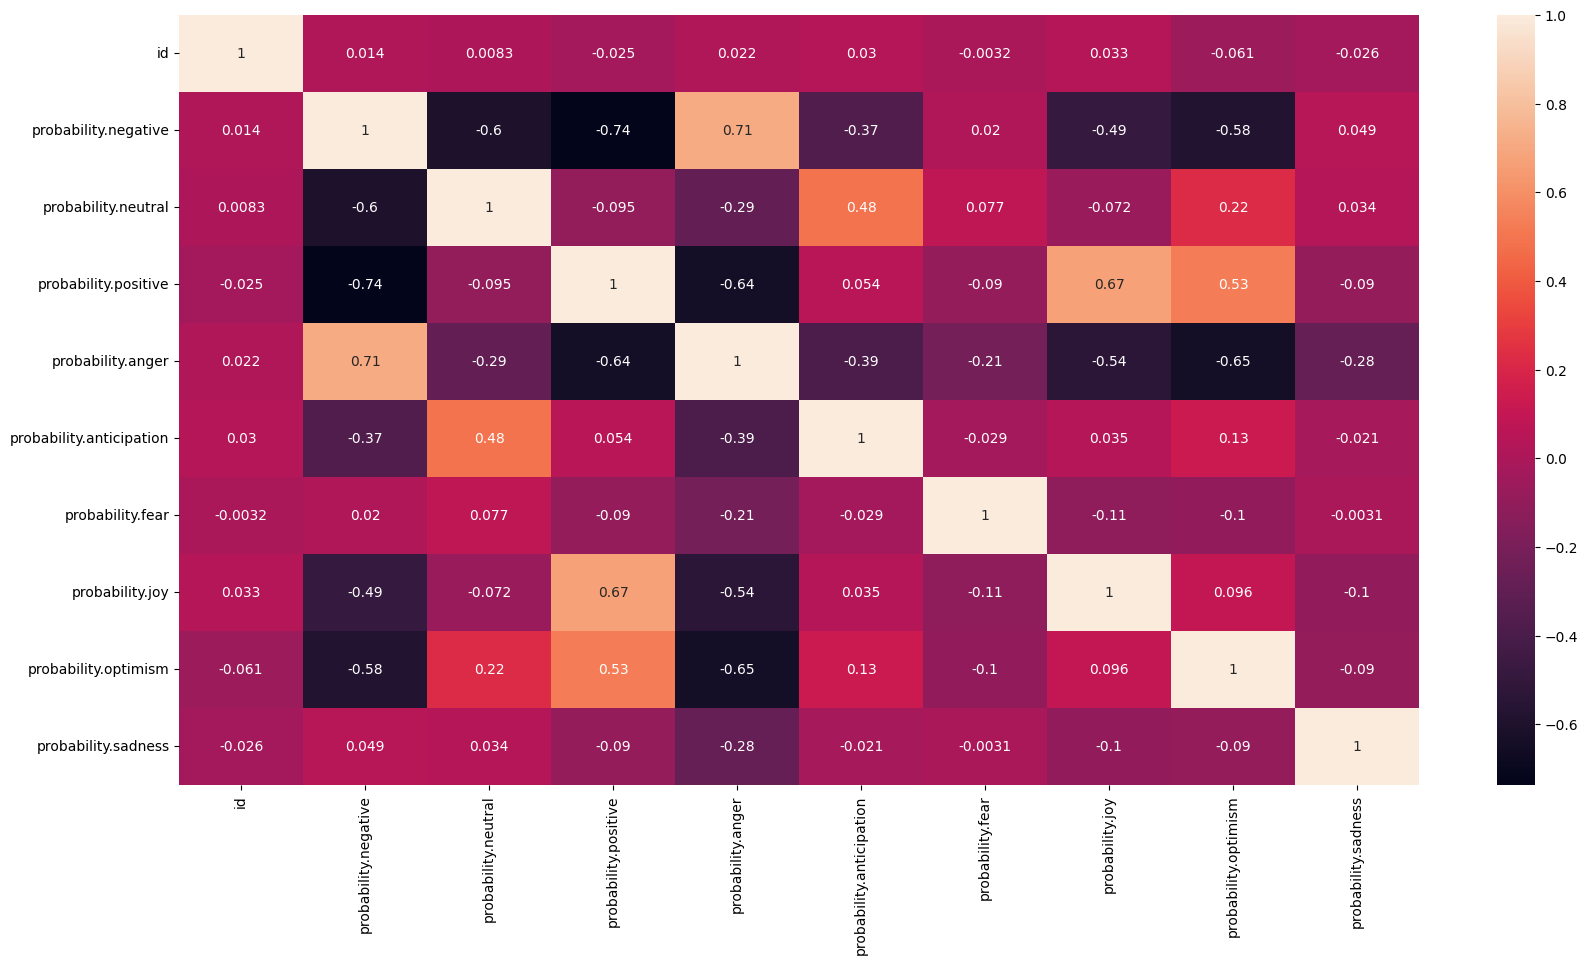

In [20]:
corr = df_final.corr()
plt.figure(figsize=(20, 10))

sns.heatmap(corr, annot=True)
plt.show()

In [13]:
df_final['emotion_label'].replace({'love': 'joy'}, inplace=True)

In [15]:
df_final['emotion_label'].replace({'disgust': 'anger'}, inplace=True)

In [17]:
df_final['emotion_label'].replace({'surprise': 'anticipation'}, inplace=True)

In [26]:
df_final.to_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet")

# Normalize Sentiment

In [5]:
df_sentiment = df_final[['id', 'probability.positive', 'probability.neutral', 'probability.negative', 'label']]

In [21]:
# Define weights
W_positive = 1
W_neutral = 0.5
W_negative = 0

In [22]:
# Calculate sentiment score
df_final['Sentiment_score'] = (W_positive * df_final['probability.positive'] + 
                         W_neutral * df_final['probability.neutral'] + 
                         W_negative * df_final['probability.negative'])


In [23]:
# Normalize sentiment score to the range from -1 to 1
df_final['Normalized_sentiment_score'] = ((df_final['Sentiment_score'] - df_final['Sentiment_score'].min()) / 
                                     (df_final['Sentiment_score'].max() - df_final['Sentiment_score'].min())) * 2 - 1


In [25]:
df_final.drop(columns='Sentiment_score', inplace=True)

In [13]:
df_sentiment.to_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\normalized_sentiment.parquet")

# Normalize Emotions

In [3]:
df_final = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet")

In [5]:
df_final.columns

Index(['id', 'cleanedContent', 'label', 'category', 'emotion_label', 'text',
       'text_without_stopwords', 'text_lemmatized',
       'text_without_stopwords_freq', 'date', 'rawContent',
       'probability.negative', 'probability.neutral', 'probability.positive',
       'probability.anger', 'probability.anticipation', 'probability.fear',
       'probability.joy', 'probability.optimism', 'probability.sadness',
       'Normalized_sentiment_score'],
      dtype='object')

In [6]:
df_emotion = df_final[['id', 'probability.anger', 'probability.anticipation', 'probability.fear',
       'probability.joy', 'probability.optimism', 'probability.sadness', 'emotion_label']]

In [ ]:
W_anger = 
W_anticipation = 0
W_fear = 
W_joy = 1
W_optimism = 
W_sadness = 

# Ordinary Least Squares

In [2]:
df_final = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\final_v2.parquet")

In [214]:
grouped = df_final.groupby('category').mean()

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_17264\2236038258.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_final.groupby('category').mean()


In [213]:
df_demo = pd.read_csv(r"C:\Users\fashaikh\Desktop\Thesis_main\thesis\acp_data\health.csv")

In [194]:
df_demo.head()

,Community,Access to Exercise Opportunities,Driving Alone to Work,Food Insecurity,Limited Access to Healthy Foods,Long Commute - Driving Alone,% 65 and Older,% American Indian or Alaska Native,% Asian,% Below 18 Years of Age,...,Voter Turnout,Child Care Cost Burden,Children Eligible for Free or Reduced Price Lunch,Children in Poverty,Children in Single-Parent Households,Gender Pay Gap,Homeownership,Severe Housing Cost Burden,Severe Housing Problems,Unemployment
0,African American South,0.5075,0.8356,0.1630,0.1003,0.3610,0.1894,0.0051,0.0070,0.2233,...,0.6100,0.2843,0.9301,0.3320,0.4209,0.79,0.6793,0.1376,0.1527,0.0569
1,Aging Farmlands,0.4560,0.7570,0.0960,0.0010,0.2460,0.2426,0.0125,0.0052,0.2256,...,0.7161,0.2588,0.4199,0.1595,0.1514,0.74,0.7808,0.0766,0.0863,0.0278
2,Big Cities,0.9779,0.7124,0.1225,0.0424,0.3775,0.1481,0.0103,0.0626,0.2176,...,0.6633,0.2814,0.6119,0.1900,0.2929,0.84,0.5525,0.1604,0.1863,0.0544
3,College Towns,0.8315,0.7704,0.1210,0.0781,0.2130,0.1647,0.0057,0.0260,0.1992,...,0.6247,0.2963,0.4751,0.1640,0.2407,0.81,0.6216,0.1416,0.1595,0.0412
4,Evangelical Hubs,0.4770,0.8294,0.1580,0.0598,0.3890,0.1997,0.0054,0.0052,0.2186,...,0.5885,0.2596,0.6299,0.2470,0.2505,0.76,0.7507,0.0959,0.1206,0.0442


In [208]:
df_demo.columns

Index(['Community', '% 65 and Older', '% American Indian or Alaska Native',
       '% Asian', '% Below 18 Years of Age', '% Female', '% Hispanic',
       '% Native Hawaiian or Other Pacific Islander', '% Non-Hispanic Black',
       '% Non-Hispanic White', '% Not Proficient in English', '% Rural',
       'Bachelor's degree', 'Census Participation', 'High School Completion',
       'High School Graduation', 'Math Scores', 'Population Medians',
       'Reading Scores', 'School Funding Adequacy', 'School Segregation',
       'Total Population'],
      dtype='object')

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_17264\3838334355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = grouped.corr()


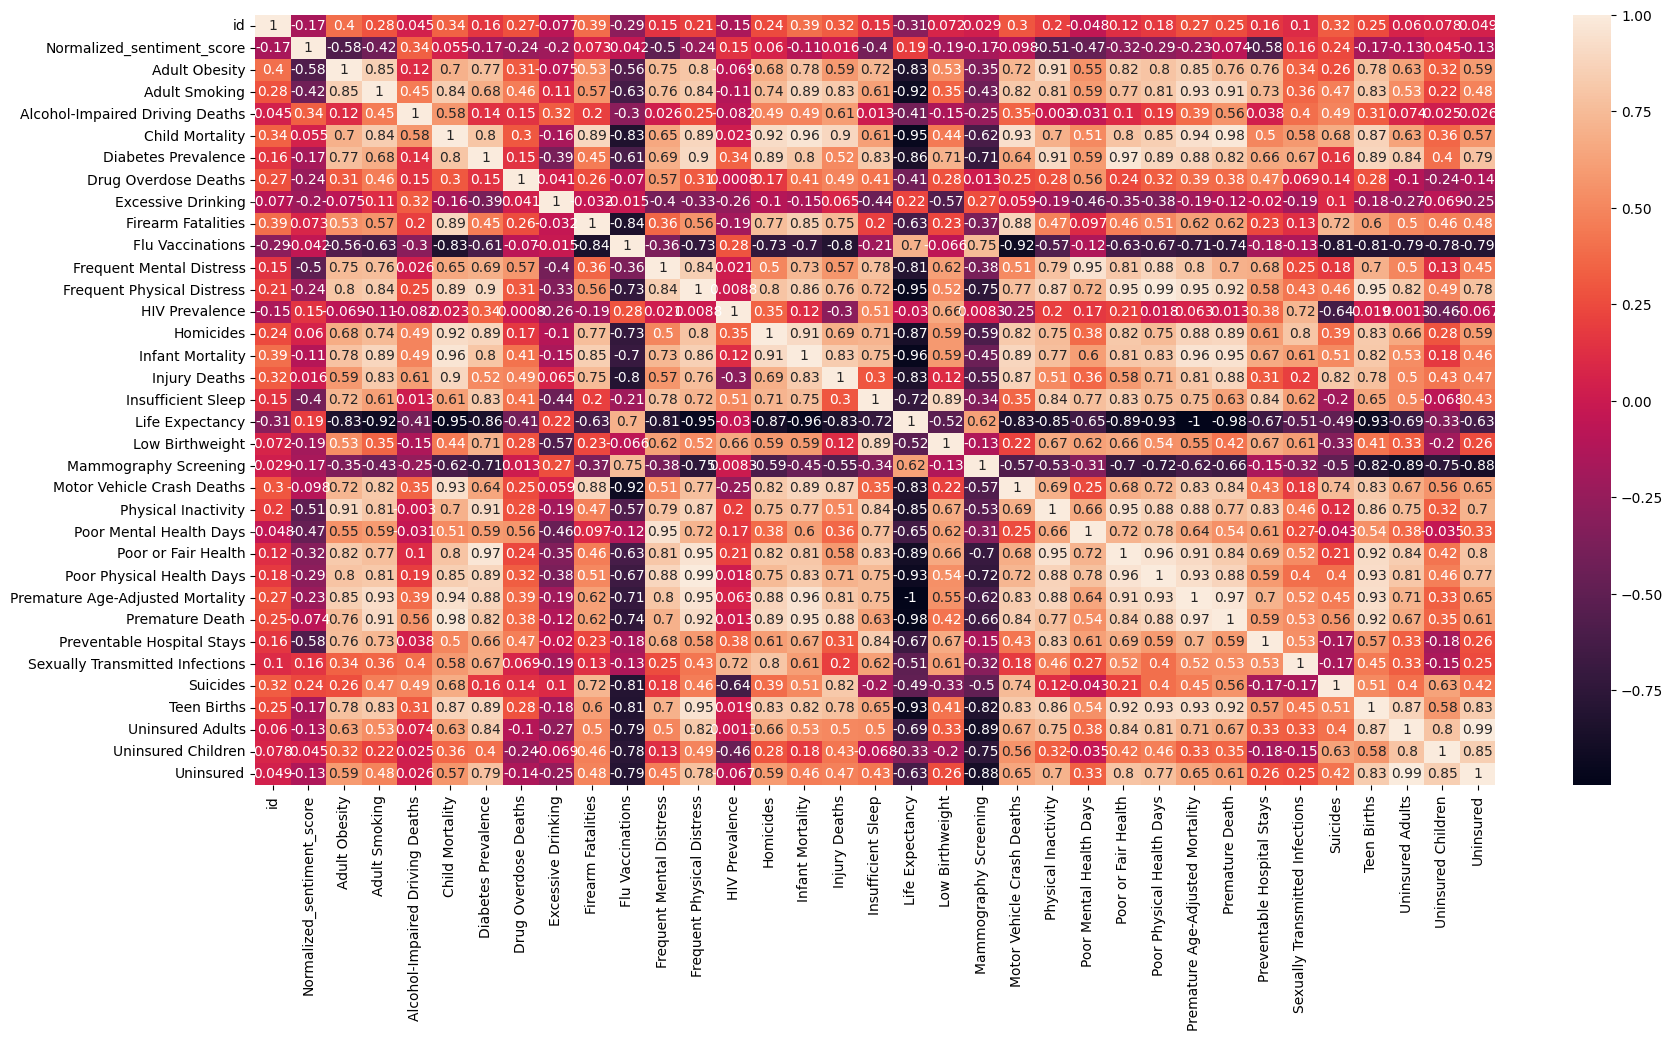

In [220]:
corr = grouped.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [215]:
grouped = grouped.merge(df_demo, 'inner', left_on= 'category', right_on='Community')

<AxesSubplot:xlabel='Children in Single-Parent Households', ylabel='Normalized_sentiment_score'>

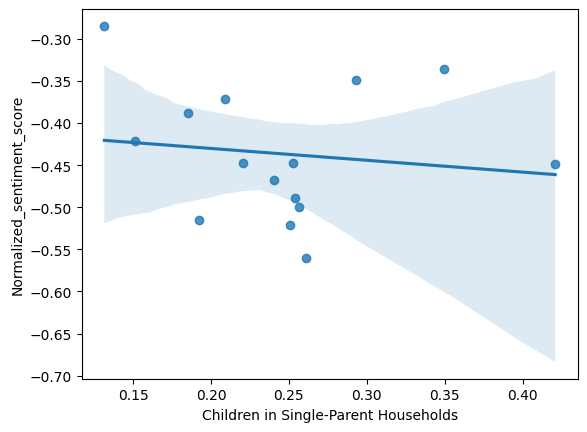

In [178]:
sns.regplot(x='Children in Single-Parent Households', 
y='Normalized_sentiment_score', data=grouped)

In [28]:
grouped.head()

,id,probability.negative,probability.neutral,probability.positive,probability.anger,probability.anticipation,probability.fear,probability.joy,probability.optimism,probability.sadness,...,Community,Access to Exercise Opportunities,Air Pollution - Particulate Matter,"Child Care Centers (Number of child care centers per 1,000 population under 5 years old)",Driving Alone to Work,"Food Environment Index (Index of factors that contribute to a healthy food environment, from 0 (worst) to 10 (best))",Food Insecurity,Limited Access to Healthy Foods,"Long Commute - Driving Alone (Among workers who commute in their car alone, the percentage that commute more than 30 minutes)",Traffic Volume (Average traffic volume per meter of major roadways in the county)
0,1.348624e+18,0.550526,0.326041,0.123433,0.689064,0.054975,0.048065,0.077799,0.089148,0.040950,...,African American South,0.5075,8.9,8.0,0.8356,6.50,0.1630,0.1003,0.3610,49
1,1.355267e+18,0.524259,0.351405,0.124336,0.667064,0.076725,0.050296,0.079294,0.081196,0.045425,...,Aging Farmlands,0.4560,5.4,7.7,0.7570,7.80,0.0960,0.0010,0.2460,20
2,1.326231e+18,0.512307,0.304969,0.182724,0.610621,0.051465,0.047427,0.094017,0.135556,0.060915,...,Big Cities,0.9779,9.0,7.1,0.7124,7.75,0.1225,0.0424,0.3775,1130
3,1.313542e+18,0.566746,0.312060,0.121194,0.710624,0.052818,0.045779,0.066894,0.083955,0.039930,...,College Towns,0.8315,7.7,8.0,0.7704,7.60,0.1210,0.0781,0.2130,285
4,1.324950e+18,0.598181,0.301803,0.100016,0.746473,0.046805,0.040038,0.055254,0.074465,0.036963,...,Evangelical Hubs,0.4770,8.1,7.0,0.8294,6.90,0.1580,0.0598,0.3890,39


In [185]:
y = grouped['Normalized_sentiment_score']

In [204]:
x = grouped[[
       '% Not Proficient in English', '% Rural',
       'Bachelor\'s degree', 'Census Participation', 'High School Completion', 'School Segregation'
       ]]
x = sm.add_constant(x)

In [205]:
results = sm.OLS(y, x).fit()
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Normalized_sentiment_score   R-squared:                       0.710
Model:                                    OLS   Adj. R-squared:                  0.492
Method:                         Least Squares   F-statistic:                     3.259
Date:                        Sun, 13 Aug 2023   Prob (F-statistic):             0.0631
Time:                                22:31:40   Log-Likelihood:                 26.833
No. Observations:                          15   AIC:                            -39.67
Df Residuals:                               8   BIC:                            -34.71
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

c:\Users\fashaikh\Desktop\Thesis_main\thesis\.venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [75]:
Y = grouped['Normalized_sentiment_score']
X = grouped['Median Household Income']

In [129]:
test_df = df_final

In [130]:
test_df = test_df[['emotion_label', 'category']]

In [131]:
dummies = pd.get_dummies(test_df, columns=['emotion_label'], drop_first=True)

In [132]:
dummies

,category,emotion_label_anticipation,emotion_label_fear,emotion_label_joy,emotion_label_optimism,emotion_label_sadness
0,African American South,0,1,0,0,0
2,African American South,0,0,0,0,0
12,African American South,0,0,0,0,0
20,African American South,0,0,0,1,0
28,African American South,0,0,0,1,0
...,...,...,...,...,...,...
57120365,Working Class Country,0,0,0,0,0
57120370,Working Class Country,0,0,0,0,0
57120378,Working Class Country,0,0,0,0,0
57120386,Working Class Country,0,0,0,0,0


In [136]:
test_df = dummies.merge(df_demo, 'left', left_on='category', right_on='Community')

In [137]:
test_df.columns

Index(['category', 'emotion_label_anticipation', 'emotion_label_fear',
       'emotion_label_joy', 'emotion_label_optimism', 'emotion_label_sadness',
       'Community', 'Access to Exercise Opportunities',
       'Air Pollution - Particulate Matter', 'Child Care Centers',
       ...
       'Homeownership', 'Income Inequality', 'Juvenile Arrests', 'Living Wage',
       'Median Household Income', 'Residential Segregation - Black/White',
       'Severe Housing Cost Burden', 'Severe Housing Problems',
       'Social Associations', 'Unemployment'],
      dtype='object', length=103)

In [138]:
test_df = test_df[['category', 'emotion_label_anticipation',
       'emotion_label_fear', 'emotion_label_joy', 'emotion_label_optimism',
       'emotion_label_sadness', 'Unemployment']]

In [118]:
y = test_df['Normalized_sentiment_score']
x = test_df[['Unemployment', 'Bachelor\'s degree']]
x = sm.add_constant(x)

In [119]:
results = sm.OLS(y, x).fit()
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Normalized_sentiment_score   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                   -0.5285
Date:                        Fri, 11 Aug 2023   Prob (F-statistic):               1.00
Time:                                19:23:48   Log-Likelihood:                -32605.
No. Observations:                       39954   AIC:                         6.521e+04
Df Residuals:                           39952   BIC:                         6.523e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

# OLS Dummy

In [21]:
df_final.head()

,id,cleanedContent,label,category,emotion_label,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq,date,...,probability.negative,probability.neutral,probability.positive,probability.anger,probability.anticipation,probability.fear,probability.joy,probability.optimism,probability.sadness,Normalized_sentiment_score
0,1257990410028359681,Everyday that the killers of #AhmaudArbery rem...,negative,African American South,fear,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...,2020-05-06 11:07:40+00:00,...,0.830641,0.159382,0.009977,0.279881,0.004095,0.352227,0.000745,0.003695,0.359357,-0.850836
2,1258706164054929408,It took 59 days for the @user to arrest #Grego...,negative,African American South,anger,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,take day arrest gregorymcmichael travismcmicha...,2020-05-08 10:31:49+00:00,...,0.806295,0.188493,0.005212,0.796906,0.005784,0.159391,0.000317,0.000924,0.036677,-0.830837
12,1260986640148955136,TN is already starting. They say that #COVID19...,negative,African American South,anger,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...,2020-05-14 17:33:37+00:00,...,0.484034,0.357467,0.158500,0.810908,0.010574,0.014736,0.002848,0.137127,0.023808,-0.345149
20,1265664683941474309,5) I pledge that I will keep myself aware of w...,neutral,African American South,optimism,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...,2020-05-27 15:22:30+00:00,...,0.170736,0.617685,0.211579,0.013011,0.030190,0.004790,0.005827,0.929707,0.016474,0.029040
28,1265698571053142016,"@user Many may not know me, but I am a progres...",positive,African American South,optimism,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn ubi end citi...,2020-05-27 17:37:09+00:00,...,0.005067,0.107326,0.887606,0.007553,0.072251,0.001653,0.069170,0.847429,0.001945,0.888683
